In [1]:
##########################################
# This notebook is used for intiial data exploration for the capstone project
##########################################


First, we import the data

In [83]:
import pandas as pd
import numpy as np
import glob

#data = pd.read_csv('data/transactions_200816.csv')  #import one file

#import all csvs (courtesy of http://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe)

path =r'data' # use your path
allFiles = glob.glob(path + "/tr*.csv")

#print allFiles
data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
data = pd.concat(list_)

print('Before DropNA',len(data))
data=data.dropna()
print('After DropNA',len(data))
#data['CUST_CODE'].head()

#list(data.columns.values)

('Before DropNA', 31057875)
('After DropNA', 21967768)


Show some sample data

In [84]:
data.head(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
1,200607,20060411,3,19,3,1.65,PRD0900035,CL00113,DEP00040,G00011,...,UM,OA,994100100257041,L,MM,Full Shop,Mixed,STORE00001,LS,E02
3,200607,20060414,6,14,1,0.46,PRD0900057,CL00107,DEP00037,G00010,...,LA,PE,994100100539059,L,LA,Full Shop,Fresh,STORE00001,LS,E02
5,200607,20060412,4,8,1,0.76,PRD0900066,CL00041,DEP00011,G00004,...,MM,OT,994100100400578,L,MM,Full Shop,Mixed,STORE00001,LS,E02
6,200607,20060412,4,12,1,1.05,PRD0900077,CL00150,DEP00052,G00015,...,LA,YF,994100100579072,L,MM,Full Shop,Mixed,STORE00001,LS,E02
7,200607,20060412,4,11,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,PE,994100100249564,M,MM,Top Up,Fresh,STORE00001,LS,E02
8,200607,20060410,2,16,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,OT,994100100355420,M,MM,Top Up,Fresh,STORE00001,LS,E02
9,200607,20060416,1,15,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,YF,994100100462089,M,MM,Small Shop,Fresh,STORE00001,LS,E02
10,200607,20060412,4,17,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,MM,YA,994100100485731,L,MM,Full Shop,Mixed,STORE00001,LS,E02
11,200607,20060414,6,9,1,0.98,PRD0900121,CL00063,DEP00019,G00007,...,LA,PE,994100100724145,L,MM,Top Up,Mixed,STORE00001,LS,E02
15,200607,20060413,5,20,1,7.82,PRD0900129,CL00067,DEP00019,G00007,...,LA,OA,994100100745448,L,LA,Full Shop,Mixed,STORE00001,LS,E02


Summarize some categorical variables

In [89]:
#product hierarchy
byhierarchy = data.groupby(['PROD_CODE_40','PROD_CODE_30','PROD_CODE_20','PROD_CODE_10'])
byhierarchy['SPEND'].count()

PROD_CODE_40  PROD_CODE_30  PROD_CODE_20  PROD_CODE_10
D00001        G00001        DEP00001      CL00001         310636
                                          CL00002         239649
                            DEP00002      CL00003         126303
                                          CL00004          21498
                                          CL00005          44351
                                          CL00006         214512
              G00002        DEP00003      CL00007         149123
                                          CL00008          62633
                                          CL00009          13386
                                          CL00010          82997
                                          CL00011          19568
                                          CL00012           6378
              G00003        DEP00004      CL00013          87749
                                          CL00014         128418
                                   

In [90]:
#customer categories
bycustomer = data.groupby(['CUST_LIFESTAGE','CUST_PRICE_SENSITIVITY'])
print(bycustomer['SPEND'].count(),bycustomer['SPEND'].mean())

(CUST_LIFESTAGE  CUST_PRICE_SENSITIVITY
OA              LA                         747050
                MM                        1488059
                UM                        1051948
                XX                           2096
OF              LA                         598112
                MM                         677555
                UM                         251874
                XX                            523
OT              LA                        1705137
                MM                        3064009
                UM                        2004849
                XX                          23309
PE              LA                         432747
                MM                         893534
                UM                         456191
                XX                           2184
YA              LA                         870693
                MM                        1523845
                UM                        1136369
          

When we look at prod_code_40='D00007' there's only 2,849 in of the 21,967,768, so we can consider dropping it.  It's mostly applicable to less affluent and mid-market customers, leaning towards younger customers.

In [102]:

#bycustomer = data[data['PROD_CODE_40']=='D00007']
byDivision=data[data['PROD_CODE_40']=='D00007'].groupby(['PROD_CODE_40','CUST_PRICE_SENSITIVITY'])
print(byDivision['SPEND'].count())
bycustomer=data[data['PROD_CODE_40']=='D00007'].groupby(['PROD_CODE_40','CUST_LIFESTAGE'])
print(byDivision['SPEND'].count())

byDivision=data.groupby(['PROD_CODE_40'])
print(bycustomer['SPEND'].count())

print 'before',len(data)
data=data[data['PROD_CODE_40']<>'D00007']
print 'after',len(data)

PROD_CODE_40  CUST_PRICE_SENSITIVITY
D00007        LA                         915
              MM                        1452
              UM                         444
              XX                          38
Name: SPEND, dtype: int64
PROD_CODE_40  CUST_PRICE_SENSITIVITY
D00007        LA                         915
              MM                        1452
              UM                         444
              XX                          38
Name: SPEND, dtype: int64
PROD_CODE_40  CUST_LIFESTAGE
D00007        OA                329
              OF                322
              OT                990
              PE                120
              YA                324
              YF                764
Name: SPEND, dtype: int64
before 21967768
after 21964919


Reformat the data into a wide dataset using Prod_code_10 as the lowest level of aggregation.  

In [103]:
#create my target variable
data["CUST_LIFESTAGE_PRICE_SENSITIVITY"] = data["CUST_LIFESTAGE"] + "-" + data["CUST_PRICE_SENSITIVITY"]

#create basketprofiles.  Simplest version will be to sum spend in each category in PROD_CODE_20, keeping the target variable as well
#pivot code from http://stackoverflow.com/questions/41046766/using-and-graphing-the-results-of-a-crosstab-dataframe-in-python

data_cross=data.pivot_table(index='BASKET_ID', columns='PROD_CODE_40', values='SPEND', aggfunc=np.sum, fill_value=0)
data_cross.reset_index(level=['BASKET_ID'], inplace=True)

#create target for the classifier
bybasket=data.groupby(['BASKET_ID'])
targetByBasket=pd.DataFrame(bybasket['CUST_LIFESTAGE_PRICE_SENSITIVITY'].first())
targetByBasket.reset_index(level=['BASKET_ID'], inplace=True)

data_cross = pd.merge(data_cross, targetByBasket, how='inner', on = 'BASKET_ID')

data_cross.head(10)
#list(data_cross.columns.values)

/Users/leanderquiring/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


PROD_CODE_40,BASKET_ID,D00001,D00002,D00003,D00004,D00005,D00006,D00008,D00009,CUST_LIFESTAGE_PRICE_SENSITIVITY
0,994100100152603,1.05,59.79,2.82,0.0,0.00,0.0,0.0,0.00,OT-UM
1,994100100152616,2.36,13.30,1.03,0.0,0.00,0.0,0.0,0.00,OT-LA
2,994100100152617,0.00,3.13,0.50,0.0,0.00,0.0,0.0,0.00,OT-LA
3,994100100152618,0.00,3.75,0.88,0.0,0.00,0.0,0.0,0.00,OT-LA
4,994100100152667,0.00,0.00,0.00,0.0,0.00,0.0,0.0,2.58,OA-UM
5,994100100152695,0.00,1.19,2.83,0.0,0.00,0.0,0.0,0.00,OT-MM
6,994100100152709,0.98,9.64,9.83,0.0,5.94,0.0,0.0,0.00,OA-MM
7,994100100152710,1.03,0.00,0.00,0.0,0.00,0.0,0.0,0.00,OA-MM
8,994100100152771,1.01,1.96,0.88,0.0,0.32,0.0,0.0,0.00,OA-LA
9,994100100152772,2.81,11.19,6.32,0.0,2.62,0.0,0.0,0.00,OA-LA


Before outlier detection
PROD_CODE_40        D00001        D00002        D00003        D00004  \
count         3.334358e+06  3.334358e+06  3.334358e+06  3.334358e+06   
mean          7.833240e-01  6.404424e+00  2.852503e+00  1.875193e-01   
std           1.544195e+00  8.895050e+00  4.866156e+00  1.488154e+00   
min           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%           0.000000e+00  6.400000e-01  0.000000e+00  0.000000e+00   
50%           0.000000e+00  2.940000e+00  9.400000e-01  0.000000e+00   
75%           1.020000e+00  8.730000e+00  3.630000e+00  0.000000e+00   
max           1.696800e+02  8.005700e+02  4.318600e+02  2.232000e+02   

PROD_CODE_40        D00005        D00006        D00008        D00009  
count         3.334358e+06  3.334358e+06  3.334358e+06  3.334358e+06  
mean          1.116880e+00  2.958826e-02  1.188631e+00  5.329337e-02  
std           2.670787e+00  5.041304e-01  1.548995e+01  4.843195e-01  
min           0.000000e+00  0.000000e+00  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1acc515d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ab58790>]], dtype=object)

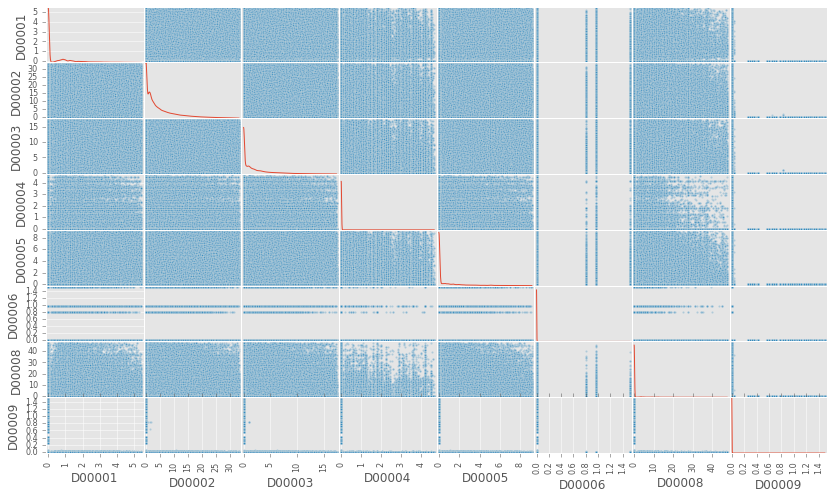

In [105]:
# do some visualization

#data_cross=data.pivot_table(index='BASKET_ID', columns='PROD_CODE_40', values='SPEND', aggfunc=np.sum, fill_value=0)
#data_cross.reset_index(level=['BASKET_ID'], inplace=True)
#d=data_cross.pop('BASKET_ID');
#d=data_cross.pop('PROD_CODE_10');
%matplotlib inline

data_cross_noBasket = data_cross
data_cross_noBasket=data_cross_noBasket.drop('BASKET_ID', axis=1)
data_cross_noBasket=data_cross_noBasket.drop('CUST_LIFESTAGE_PRICE_SENSITIVITY', axis=1)

#delete anything that has an outlier (greater than 3 sigma) in any column
#code from http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
#len(data_cross_noBasket) #29001 
#from scipy import stats
print 'Before outlier detection'
print(data_cross_noBasket.describe())
#data_cross_noBasket['D00007'].hist()
data_cross_noBasket=data_cross_noBasket[(np.abs(stats.zscore(data_cross_noBasket)) < 3).all(axis=1)]
#len(data_cross_noBasket) #26207
print 'After outlier detection'
print(data_cross_noBasket.describe())

pd.scatter_matrix(data_cross_noBasket, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

#data_cross_noBasket.head(10)
#list(data_cross_noBasket.columns.values)



26207

# Naive Classifier Work

In [ ]:
#do all the work for the naive classifier

#create variables for the naive classifier
spendByBasket=pd.DataFrame(bybasket['SPEND'].sum())
spendByBasket.reset_index(level=['BASKET_ID'], inplace=True)

basketTypeByBasket=pd.DataFrame(bybasket['BASKET_TYPE'].first())
basketTypeByBasket.reset_index(level=['BASKET_ID'], inplace=True)

basketSizeByBasket=pd.DataFrame(bybasket['BASKET_SIZE'].first())
basketSizeByBasket.reset_index(level=['BASKET_ID'], inplace=True)

weekdayByBasket=pd.DataFrame(bybasket['SHOP_WEEKDAY'].first())
weekdayByBasket.reset_index(level=['BASKET_ID'], inplace=True)

#merge them back in
data_cross_naive = pd.merge(data_cross, spendByBasket, how='inner', on = 'BASKET_ID')
data_cross_naive = pd.merge(data_cross_naive, basketTypeByBasket, how='inner', on = 'BASKET_ID')
data_cross_naive = pd.merge(data_cross_naive, basketSizeByBasket, how='inner', on = 'BASKET_ID')
data_cross_naive = pd.merge(data_cross_naive, weekdayByBasket, how='inner', on = 'BASKET_ID')

In [19]:
#create the training, testing split
from sklearn.cross_validation import train_test_split
#split off the target variable
y = data_cross.pop("CUST_LIFESTAGE_PRICE_SENSITIVITY")
X = data_cross

#split the data into training and testing, from http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

In [15]:
#create the naive predictor

avgTrainSpend=X_train['SPEND'].mean()
stDevTrainSpend=X_train['SPEND'].std()


def NaiveClassifier(test, trainMean, trainStd):

    if(test['SPEND']<trainMean-trainStd):
            if(test['BASKET_TYPE']='Full Shop')
                   naivePriceSens = 'LA'
            else:
                    naivePriceSens = 'MM'
    elif(test['SPEND']>rainMean-trainStd):
        if(test['BASKET_TYPE']='Full Shop')
                   naivePriceSens = 'MM
            else:
                    naivePriceSens = 'UM'
    else:
        naivePriceSens = 'MM'
    
    if (test["SHOP_WEEKDAY"] = 7) or (test["SHOP_WEEKDAY"] = 1):
        if(test['BASKET_SIZE'] = 'Small'):
            if(test['BASKET_TYPE']='Small Shop')
                   naivePriceSens = 'YA'
            else:
                    naivePriceSens = 'OA'
        elif(test['BASKET_SIZE'] = 'Medium'):
            naiveLifeStage = 'YF'
        else:
            naiveLifeStage = 'OF'            
    else:
        naiveLifeStage = 'PE'
    
    
    
    return naivePriceSens + "-" naiveLifeStage

#apply to every row
#X_test.apply(NaiveClassifier, args=(avgTrainSpend,stDevTrainSpend)) # returns DataFrame


In [ ]:
#pop the two classifiers used for the naive predictor before doing any classification
X_train.pop("SPEND")
X_train.pop("SHOP_WEEKDAY")
X_test.pop("SPEND")
X_test.pop("SHOP_WEEKDAY")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

rfc = rfc.fit(X_train, y_train)
#rfc_pred = rfc.predict(X_test)
rfc.score(X_test,y_test)

In [ ]:
#requires sklearn 0.18
#conda update sklearn

from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann = ann.fit(X_train, y_train)
ann.score(X_test,y_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

nn = KNeighborsClassifier(n_neighbors=1)
nn = nn.fit(X_train,y_train)
#nn_pred = nn.pred(X_test)
nn.score(X_test,y_test)

0.67114788004136505

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(X_train, y_train)
ada.score(X_test,y_test)

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
#random useful code snippets
list(data.columns.values)
data['SPEND'].dtype
data_cross.head(10)